In [1]:
import semiolog as slg

import random

In [2]:
semiotic = slg.load("en_bnc_test")

In [3]:
test_sent = random.choice(semiotic.test_sents())
# test_sent = "I have made My Plans, and I must stick: to them!"

text = semiotic(test_sent)


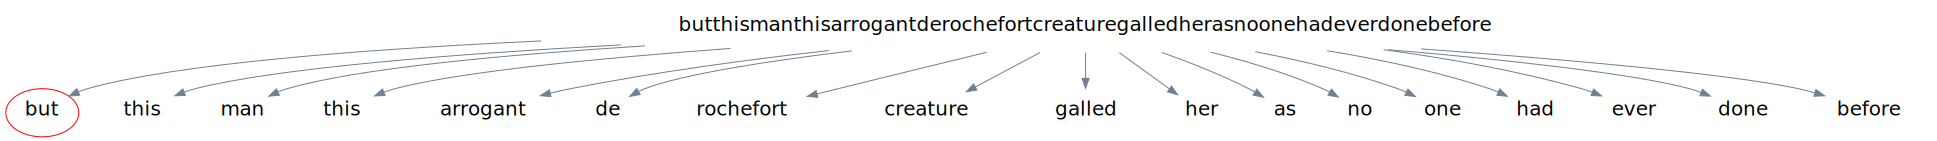

In [6]:
text.tree.plot([("but",(0,3))])

In [ ]:

print(text.chain)

print([text.chain.labels[i] for i in text.type_chain.scores_min])

text.type_chain.plot_scores(show_mean=True, show_probs=True)

In [18]:
from semiolog import util_g
from scipy.stats import entropy
from math import log

parad_pair = util_g.subsequences(text.parad_chain.keys_t_soft,2)

n = 2
cross_parad_pair = [(l,r) for l in parad_pair[n][0] for r in parad_pair[n][1]]

iid_prob_parad_pair = [semiotic.vocab.prob.get(l,0)*semiotic.vocab.prob.get(r,0) for l,r in cross_parad_pair]

prob_parad_pair = [semiotic.ng2.prob.get(pair,0) for pair in cross_parad_pair]

cross_entropy = entropy(iid_prob_parad_pair,qk=prob_parad_pair)

print(cross_entropy)

util_g.plot_scatter_line([str(pair) for pair in cross_parad_pair],prob_parad_pair, add_trace=([str(pair) for pair in cross_parad_pair],iid_prob_parad_pair, "iid"))

# util_g.plot_scatter_line([str(pair) for pair in cross_parad_pair],iid_prob_parad_pair)

inf


In [21]:
[((token.head.label,token.head.span),(token.label,token.span)) for token in text.chain.tokens]

[(('weproducesauceforthebenefitoftomatojuicethroughouttheworld', (0, 58)),
  ('we', (0, 2))),
 (('weproducesauceforthebenefitoftomatojuicethroughouttheworld', (0, 58)),
  ('produce', (2, 9))),
 (('weproducesauceforthebenefitoftomatojuicethroughouttheworld', (0, 58)),
  ('sauce', (9, 14))),
 (('weproducesauceforthebenefitoftomatojuicethroughouttheworld', (0, 58)),
  ('for', (14, 17))),
 (('weproducesauceforthebenefitoftomatojuicethroughouttheworld', (0, 58)),
  ('the', (17, 20))),
 (('weproducesauceforthebenefitoftomatojuicethroughouttheworld', (0, 58)),
  ('benefit', (20, 27))),
 (('weproducesauceforthebenefitoftomatojuicethroughouttheworld', (0, 58)),
  ('of', (27, 29))),
 (('weproducesauceforthebenefitoftomatojuicethroughouttheworld', (0, 58)),
  ('tomato', (29, 35))),
 (('weproducesauceforthebenefitoftomatojuicethroughouttheworld', (0, 58)),
  ('juice', (35, 40))),
 (('weproducesauceforthebenefitoftomatojuicethroughouttheworld', (0, 58)),
  ('throughout', (40, 50))),
 (('weproducesa